In [86]:
# Importing Libraries
import pandas as pd
import numpy as np
from pandas import ExcelWriter
from pandas import ExcelFile
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from fancyimpute import KNN 
import os
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import r2_score
from scipy import stats
%matplotlib inline

In [87]:
#Working directory
os.chdir("/Users/raghavkotwal/Documents/Data Science/Employee Absenteeism")

#Reading Data
df = pd.read_excel("Absenteeism_at_work_Project.xls")


# Exploratory Data Analysis

In [88]:
# Explore data
pd.set_option('display.max_columns', 500)
df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,97.0,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,97.0,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0
5,3,23.0,7.0,6,1,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,NaN
6,10,22.0,7.0,6,1,NaN,52.0,3.0,28.0,239554.0,97.0,0.0,1.0,1.0,1.0,0.0,4.0,80.0,172.0,27.0,8.0
7,20,23.0,7.0,6,1,260.0,50.0,11.0,36.0,239554.0,97.0,0.0,1.0,4.0,1.0,0.0,0.0,65.0,168.0,23.0,4.0
8,14,19.0,7.0,2,1,155.0,12.0,14.0,34.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,0.0,95.0,196.0,25.0,40.0
9,1,22.0,7.0,2,1,235.0,11.0,14.0,37.0,239554.0,97.0,0.0,3.0,1.0,0.0,0.0,1.0,88.0,172.0,29.0,8.0


In [89]:
# Data Types of all the variables
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason for absence                 737 non-null float64
Month of absence                   739 non-null float64
Day of the week                    740 non-null int64
Seasons                            740 non-null int64
Transportation expense             733 non-null float64
Distance from Residence to Work    737 non-null float64
Service time                       737 non-null float64
Age                                737 non-null float64
Work load Average/day              730 non-null float64
Hit target                         734 non-null float64
Disciplinary failure               734 non-null float64
Education                          730 non-null float64
Son                                734 non-null float64
Social drinker                     737 non-null float64
Social smoker                      736 non-null float64
Pet  

In [90]:
df.shape

(740, 21)

In [91]:
## Removing 0 values from Target variable.

In [92]:
df = df.drop(df[df['Absenteeism time in hours'].isnull()].index, axis=0)
print(df.shape)
print(df['Absenteeism time in hours'].isnull().sum())

(718, 21)
0


In [93]:
#Converting required variables to Categorical type
df['ID'] = df['ID'].astype('category')

df['Reason for absence'] = df['Reason for absence'].replace(0,np.nan)
df['Reason for absence'] = df['Reason for absence'].astype('category')

df['Month of absence'] = df['Month of absence'].replace(0,np.nan)
df['Month of absence'] = df['Month of absence'].astype('category')

df['Day of the week'] = df['Day of the week'].astype('category')
df['Seasons'] = df['Seasons'].astype('category')
df['Disciplinary failure'] = df['Disciplinary failure'].astype('category')
df['Education'] = df['Education'].astype('category')
df['Son'] = df['Son'].astype('category')
df['Social drinker'] = df['Social drinker'].astype('category')
df['Social smoker'] = df['Social smoker'].astype('category')
df['Pet'] = df['Pet'].astype('category')

# MISSING VALUE ANALYSIS

In [94]:
#Creating dataframe with missing values and reset the index
missing_value = pd.DataFrame(df.isnull().sum()).reset_index()

#Renaming variables of missing_values to 0.
missing_value = missing_value.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

#Calculating missing value percentage and sort
missing_value['Missing_percentage'] = (missing_value['Missing_percentage']/len(df))*100
missing_value = missing_value.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)

# Saving output result into csv file
missing_value.to_csv("Missing_per.csv", index = False)


# IMPUTE MISSING VALUE

In [95]:
df['Transportation expense'].iloc[6]

260.0

In [96]:
# Checking for "Body mass index" column
# Actual value = 260
# Mean = 220.34
# Median = 225
# KNN = 250.97


#create missing value
#df['Transportation expense'].iloc[6] = np.nan

In [97]:
## Impute with mean
# df['Transportation expense'] = df['Transportation expense'].fillna(df['Transportation expense'].mean())
# df['Transportation expense'].iloc[6]

# Impute with median
# df['Transportation expense'] = df['Transportation expense'].fillna(df['Transportation expense'].median())
# df['Transportation expense'].iloc[6]

In [98]:
#Apply KNN imputation algorithm
df = pd.DataFrame(KNN(k = 3).fit_transform(df), columns = df.columns)

Imputing row 1/718 with 0 missing, elapsed time: 0.222
Imputing row 101/718 with 1 missing, elapsed time: 0.225
Imputing row 201/718 with 0 missing, elapsed time: 0.228
Imputing row 301/718 with 0 missing, elapsed time: 0.231
Imputing row 401/718 with 0 missing, elapsed time: 0.233
Imputing row 501/718 with 1 missing, elapsed time: 0.234
Imputing row 601/718 with 0 missing, elapsed time: 0.236
Imputing row 701/718 with 0 missing, elapsed time: 0.237


In [99]:
# Checking if all the missing value imputed
df.isnull().sum().sum()

0

# Continous variables Disribution plot

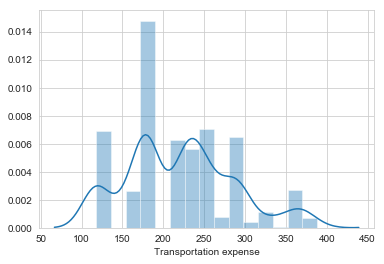

In [100]:
sns.distplot(df['Transportation expense'])

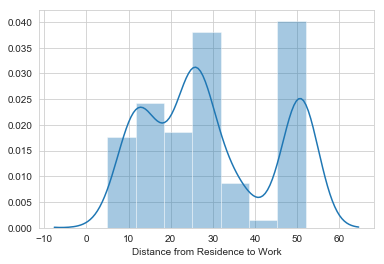

In [101]:
sns.distplot(df['Distance from Residence to Work'])

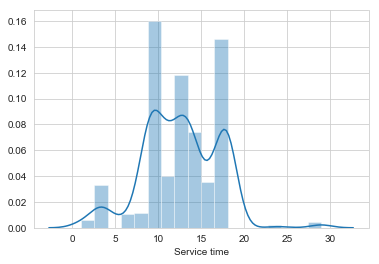

In [102]:
sns.distplot(df['Service time'])

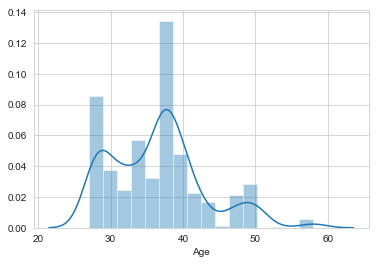

In [103]:
sns.distplot(df['Age'])

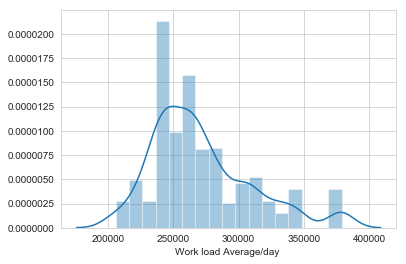

In [104]:
sns.distplot(df['Work load Average/day '])

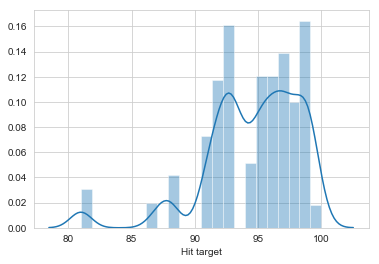

In [105]:
sns.distplot(df['Hit target'])

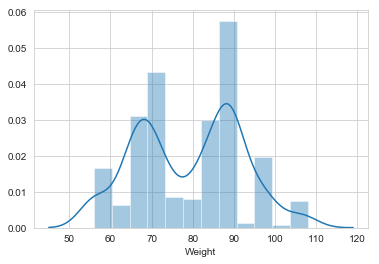

In [106]:
sns.distplot(df['Weight'])

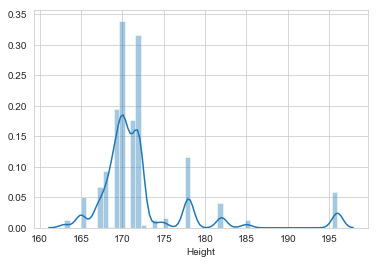

In [107]:
sns.distplot(df['Height'])

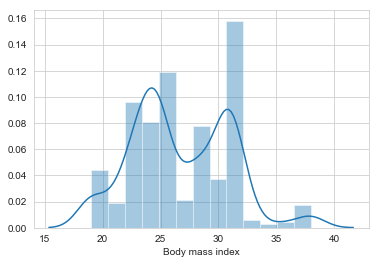

In [108]:
sns.distplot(df['Body mass index'])

In [109]:
## It can be seen from above plots all continuous variables have skewed distributions.

# Plotting Categorical variables

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update y

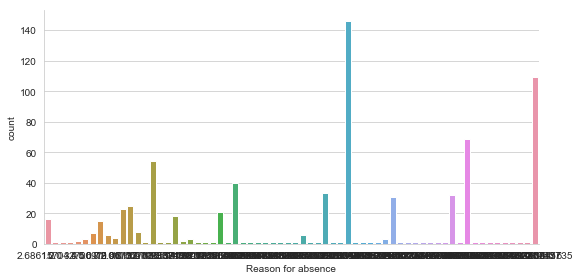

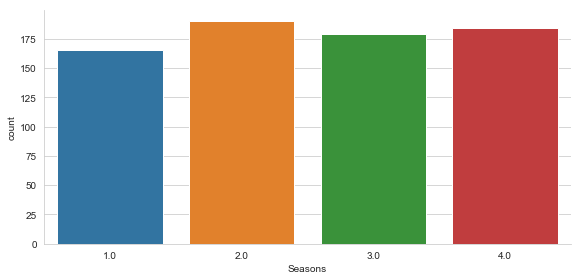

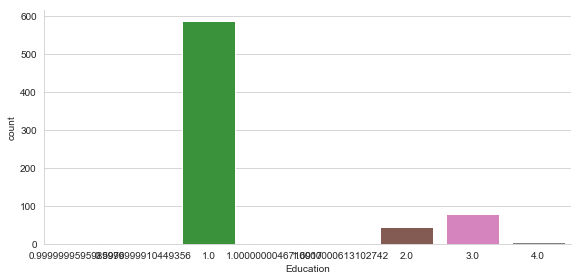

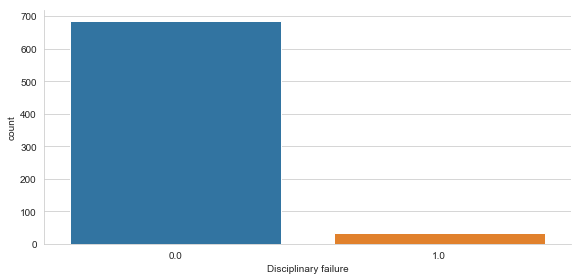

In [110]:
#Check the bar graph of categorical Data using factorplot
sns.set_style("whitegrid")
sns.factorplot(data=df, x='Reason for absence', kind= 'count',size=4,aspect=2)
sns.factorplot(data=df, x='Seasons', kind= 'count',size=4,aspect=2)
sns.factorplot(data=df, x='Education', kind= 'count',size=4,aspect=2)
sns.factorplot(data=df, x='Disciplinary failure', kind= 'count',size=4,aspect=2)

# Outlier Analysis

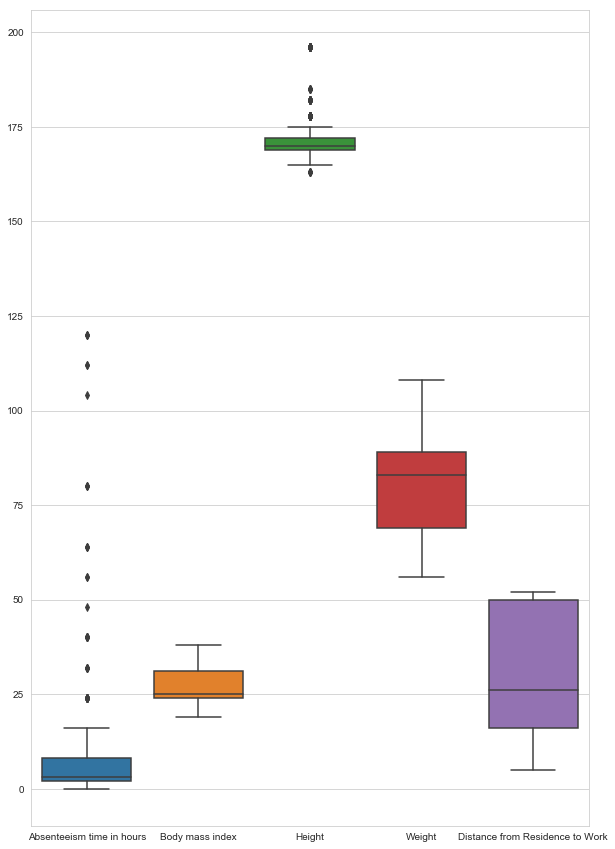

In [111]:
#Outlier Analysis using boxplot
sns.boxplot(data=df[['Absenteeism time in hours','Body mass index','Height','Weight','Distance from Residence to Work']])
fig=plt.gcf()
fig.set_size_inches(10,15)



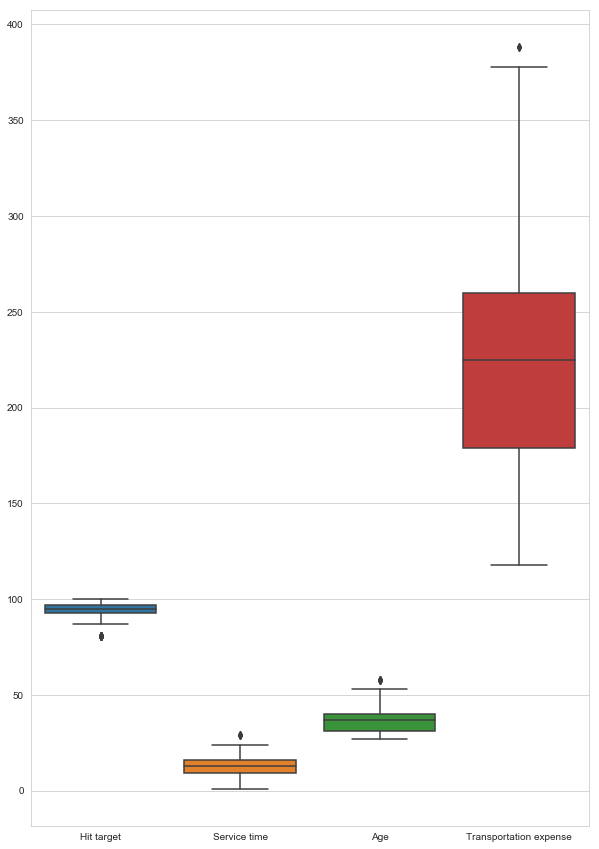

In [112]:
sns.boxplot(data=df[['Hit target','Service time','Age','Transportation expense']])
fig=plt.gcf()
fig.set_size_inches(10,15)

In [113]:
# Variables 'Distance from Residence to Work', 'Weight' and 'Body mass index' have no outliers.

In [114]:
# Removing outliers
for i in ['Transportation expense','Service time','Age','Work load Average/day ','Hit target','Height',\
'Absenteeism time in hours']:
    q75,q25 = np.percentile(df.loc[:,i],[75,25])
    iqr = q75-q25
    min = q25-1.5*iqr
    max = q75+1.5*iqr
    df.loc[df[i]< min,i] = np.nan
    df.loc[df[i]> max,i] = np.nan
    
# Imputing missing values with KNN
df = pd.DataFrame(KNN(k = 3).fit_transform(df), columns = df.columns)
# Checking if there is any missing value
df.isnull().sum().sum()

Imputing row 1/718 with 0 missing, elapsed time: 0.201
Imputing row 101/718 with 0 missing, elapsed time: 0.203
Imputing row 201/718 with 1 missing, elapsed time: 0.204
Imputing row 301/718 with 0 missing, elapsed time: 0.208
Imputing row 401/718 with 0 missing, elapsed time: 0.210
Imputing row 501/718 with 0 missing, elapsed time: 0.212
Imputing row 601/718 with 2 missing, elapsed time: 0.215
Imputing row 701/718 with 0 missing, elapsed time: 0.218


0

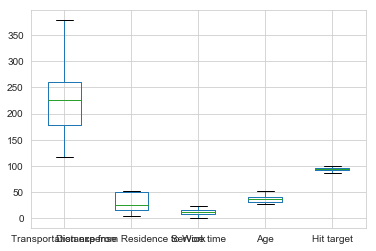

In [115]:
df.boxplot(column=['Transportation expense','Distance from Residence to Work', 'Service time', 'Age','Hit target'])


# Feature Selection

# Correlation Analysis

In [116]:
continuous_vars = ['Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Transportation expense',
       'Hit target', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours']

categorical_vars = ['ID','Reason for absence','Month of absence','Day of the week',
                     'Seasons','Disciplinary failure', 'Education', 'Social drinker',
                     'Social smoker', 'Pet', 'Son']

In [117]:
##Correlation analysis for continuous variables
df_corr = df.loc[:,continuous_vars]

[]

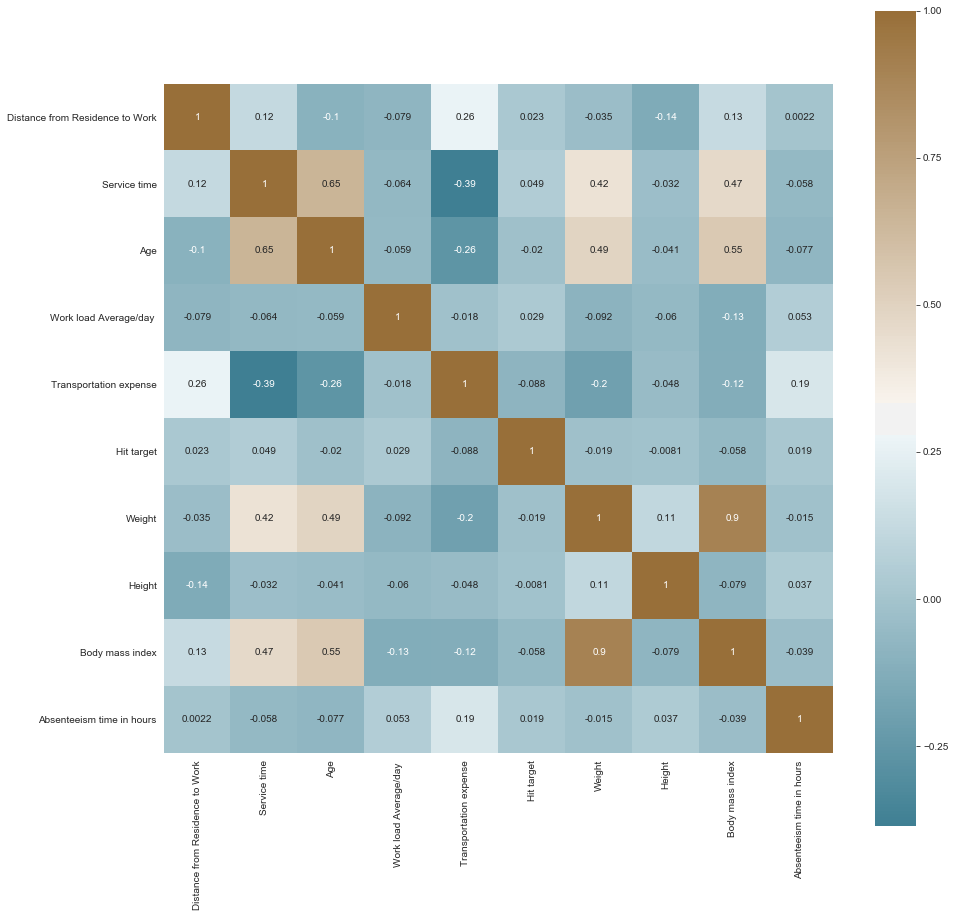

In [118]:
#Check for multicollinearity using corelation graph
f, ax = plt.subplots(figsize=(15, 15))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 50, as_cmap=True),
            square=True, ax=ax, annot = True)
plt.plot()

In [119]:

## Performing one way anova on categorical dataset

for i in categorical_vars:
    print(i) 
    print(stats.f_oneway(df[i],df['Absenteeism time in hours']))

ID
F_onewayResult(statistic=999.4202091149405, pvalue=6.989799174271784e-167)
Reason for absence
F_onewayResult(statistic=3030.914493314297, pvalue=0.0)
Month of absence
F_onewayResult(statistic=114.56779645291411, pvalue=8.934873222215947e-26)
Day of the week
F_onewayResult(statistic=11.024728237176, pvalue=0.0009216314997795719)
Seasons
F_onewayResult(statistic=186.69168346889816, pvalue=4.7988463286927624e-40)
Disciplinary failure
F_onewayResult(statistic=1147.7129466869442, pvalue=2.5526396377715277e-185)
Education
F_onewayResult(statistic=558.3487961126551, pvalue=1.5842231214546383e-104)
Social drinker
F_onewayResult(statistic=873.451249845308, pvalue=2.5927221286057953e-150)
Social smoker
F_onewayResult(statistic=1132.2430665030345, pvalue=1.9059584437995077e-183)
Pet
F_onewayResult(statistic=705.3108720721207, pvalue=1.0075813930259317e-126)
Son
F_onewayResult(statistic=629.5221625166773, pvalue=1.785222888725945e-115)


In [121]:
## Dimension reduction
df = df.drop(["Weight","Day of the week","Seasons","Education","Social smoker","Social drinker"],axis = 1)
df.head()

,ID,Reason for absence,Month of absence,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Son,Pet,Height,Body mass index,Absenteeism time in hours
0,11.0,26.000000,7.0,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,2.0,1.0,172.0,30.0,4.0
1,36.0,19.978534,7.0,118.0,13.0,18.0,50.0,239554.0,97.0,1.0,1.0,0.0,170.0,31.0,0.0
2,3.0,23.000000,7.0,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,0.0,0.0,170.0,31.0,2.0
3,7.0,7.000000,7.0,279.0,5.0,14.0,39.0,239554.0,97.0,0.0,2.0,0.0,168.0,24.0,4.0
4,11.0,23.000000,7.0,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,2.0,1.0,172.0,30.0,2.0


# Model development

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
## Convert data to float type
df.dtypes
for i in df.columns.values:
    df[i] = df[i].astype('float')
    
df.dtypes


ID                                 float64
Reason for absence                 float64
Month of absence                   float64
Transportation expense             float64
Distance from Residence to Work    float64
Service time                       float64
Age                                float64
Work load Average/day              float64
Hit target                         float64
Disciplinary failure               float64
Son                                float64
Pet                                float64
Height                             float64
Body mass index                    float64
Absenteeism time in hours          float64
dtype: object

In [127]:
## Split data to train and test
df_test , df_train = train_test_split(df,test_size = 0.25)

# Linear regression

In [128]:
import statsmodels.api as sm
modelLR = sm.OLS(df_train.iloc[:,14],df_train.iloc[:,0:14],data = df).fit()
modelLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Absenteeism time in hours   R-squared:                       0.716
Model:                                   OLS   Adj. R-squared:                  0.692
Method:                        Least Squares   F-statistic:                     29.91
Date:                       Fri, 19 Apr 2019   Prob (F-statistic):           3.30e-38
Time:                               01:14:50   Log-Likelihood:                -452.64
No. Observations:                        180   AIC:                             933.3
Df Residuals:                            166   BIC:                             978.0
Df Model:                                 14                                         
Covariance Type:                   nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
ID                                 -0.0612      0.032     -1.896      0.060      -0.125       0.003
Reason for absence                 -0.1629      0.037     -4.401      0.000      -0.236      -0.090
Month of absence                   -0.0550      0.075     -0.730      0.467      -0.204       0.094
Transportation expense              0.0078      0.005      1.421      0.157      -0.003       0.019
Distance from Residence to Work    -0.0106      0.019     -0.545      0.587      -0.049       0.028
Service time                       -0.1171      0.120     -0.979      0.329      -0.353       0.119
Age                                -0.0482      0.070     -0.685      0.495      -0.187       0.091
Work load Average/day            5.029e-06   7.27e-06      0.692      0.490   -9.32e-06    1.94e-05
Hit target                         -0.0801      0.082     -0.977      0.330      -0.242       0.082
Disciplinary failure               -4.8277      1.287     -3.750      0.000      -7.369      -2.286
Son                                 0.4719      0.248      1.906      0.058      -0.017       0.961
Pet                                -0.3014      0.252     -1.195      0.234      -0.799       0.197
Height                              0.0918      0.049      1.876      0.062      -0.005       0.188
Body mass index                     0.0611      0.078      0.787      0.433      -0.092       0.215
==============================================================================
Omnibus:                       51.136   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.317
Skew:                           1.224   Prob(JB):                     6.13e-28
Kurtosis:                       6.274   Cond. No.                     1.50e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [130]:
## Predict 
predictLR = modelLR.predict(df_test.iloc[:,0:14])
#RMSE
math.sqrt(mean_squared_error(df_test.iloc[:,14],predictLR))


2.878254427777106

# Decision Tree

In [131]:
modelDT = DecisionTreeRegressor(max_depth=2).fit(df_train.iloc[:,0:14],df_train.iloc[:,14])

In [132]:
predictDT = modelDT.predict(df_test.iloc[:,0:14])

In [133]:
##RMSE
math.sqrt(mean_squared_error(df_test.iloc[:,14],predictDT))

3.0681437690675164

# Random Forest

In [135]:
modelRF = RandomForestRegressor(max_depth=2,n_estimators=10,random_state=0,max_features=10).fit(df_train.iloc[:,0:14],df_train.iloc[:,14])

In [136]:
predictRF = modelRF.predict(df_test.iloc[:,0:14])

In [137]:
#RMSE
math.sqrt(mean_squared_error(df_test.iloc[:,14],predictRF))

2.8860445395189442

# Monthly Loss For The Company

In [138]:
#absenteeism_data.columns.values
loss_data = df[["Month of absence","Work load Average/day ","Service time","Absenteeism time in hours"]]

In [139]:
loss_data["Work Loss"]=(df["Work load Average/day "]/df["Service time"])*df["Absenteeism time in hours"]
loss_data

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Month of absence,Work load Average/day,Service time,Absenteeism time in hours,Work Loss
0,7.000000,239554.0,13.0,4.000000,7.370892e+04
1,7.000000,239554.0,18.0,0.000000,0.000000e+00
2,7.000000,239554.0,18.0,2.000000,2.661711e+04
3,7.000000,239554.0,14.0,4.000000,6.844400e+04
4,7.000000,239554.0,13.0,2.000000,3.685446e+04
5,7.000000,239554.0,3.0,8.000000,6.388107e+05
6,7.000000,239554.0,11.0,4.000000,8.711055e+04
7,7.000000,239554.0,14.0,3.137931,5.369314e+04
8,7.000000,239554.0,14.0,8.000000,1.368880e+05
9,7.000000,239554.0,11.0,8.000000,1.742211e+05


In [140]:
monthly_loss = loss_data[["Month of absence","Work Loss"]]

In [141]:
monthly_loss = monthly_loss.groupby("Month of absence").sum()
monthly_loss

,Work Loss
Month of absence,
1.000000,0.000000e+00
1.000000,4.765290e+06
2.000000,8.003205e+06
3.000000,1.017473e+07
3.368538,0.000000e+00
4.000000,6.356952e+06
5.000000,6.229180e+06
6.000000,1.025302e+07
6.158964,0.000000e+00


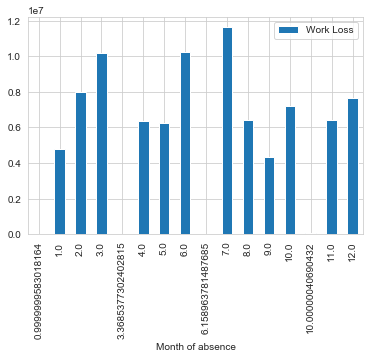

In [142]:
#sns.barplot(monthly_loss[["Month of absence"]])
monthly_loss.plot(kind='bar')